<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-файла-и-ознакомление-с-данными" data-toc-modified-id="Загрузка-файла-и-ознакомление-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка файла и ознакомление с данными</a></span></li><li><span><a href="#Лемматизация-текста" data-toc-modified-id="Лемматизация-текста-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация текста</a></span></li><li><span><a href="#Разбиение-данных-на-выборки" data-toc-modified-id="Разбиение-данных-на-выборки-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разбиение данных на выборки</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Устранение-дисбаланса-взвешиванием-классов" data-toc-modified-id="Устранение-дисбаланса-взвешиванием-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Устранение дисбаланса взвешиванием классов</a></span></li><li><span><a href="#Обучение-модели-категориального-бустинга" data-toc-modified-id="Обучение-модели-категориального-бустинга-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели категориального бустинга</a></span></li><li><span><a href="#Обучение-модели-древа-решений" data-toc-modified-id="Обучение-модели-древа-решений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обучение модели древа решений</a></span></li><li><span><a href="#Обучение-модели-логистической-регрессии" data-toc-modified-id="Обучение-модели-логистической-регрессии-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Обучение модели логистической регрессии</a></span></li><li><span><a href="#Предсказания-на-тестовой-выборке-для-лучшей-модели" data-toc-modified-id="Предсказания-на-тестовой-выборке-для-лучшей-модели-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Предсказания на тестовой выборке для лучшей модели</a></span></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Начинаю с подключения библиотек.

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
import spacy
from spacy import load
from transformers import GPT2Config, GPT2Model
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger')
import re
import time
from sklearn.metrics import mean_squared_error, f1_score, roc_auc_score, roc_curve
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import lightgbm as lgb

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Библиотеки подгружены. Приступаю к работе.

## Подготовка

### Загрузка файла и ознакомление с данными

Загружаю файл данных через try-except для подстраховки.

In [ ]:
try:
    data = pd.read_csv('/datasets/toxic_comments.csv')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/toxic_comments.csv')

Взгляну на несколько строк данных и общую информацию о файле.

In [ ]:
data.head()

,Unnamed: 0,text,toxic
0,0,Explanation\nWhy the edits made under my usern...,0
1,1,D'aww! He matches this background colour I'm s...,0
2,2,"Hey man, I'm really not trying to edit war. It...",0
3,3,"""\nMore\nI can't make any real suggestions on ...",0
4,4,"You, sir, are my hero. Any chance you remember...",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  159292 non-null  int64 
 1   text        159292 non-null  object
 2   toxic       159292 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.6+ MB


К типам данных вопросов нет, пропусков нет. Мне непонятен столбец Unnamed, который будто бы повторяет столбец индекса. Удалю его.

In [ ]:
data = data.drop(['Unnamed: 0'],axis = 1)

И ещё раз взгляну на данные.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159292 entries, 0 to 159291
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [ ]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Маловероятно, но, всё же, надо убедиться, что дубликатов нет.

In [ ]:
data.duplicated().sum()

0

Хорошо. Теперь уточнюсь насчёт баланса значений ключевого параметра.

In [ ]:
data['toxic'].value_counts()

0    143106
1     16186
Name: toxic, dtype: int64

Чудовищный дисбаланс. Необходимо учесть это в дальнейшей работе.

In [ ]:
ratio = data['toxic'].value_counts()[0] / data['toxic'].value_counts()[1]

In [ ]:
ratio

8.841344371679229

Разница почти 9 раз!

### Лемматизация текста

Напишу функцию лемматизации текста через pos-tag.

%%time
nlp = spacy.load('en_core_web_sm')
lemma = []

for doc in nlp.pipe(data["text"].values):
    lemma.append([n.lemma_ for n in doc])

    data['lemm_text'] = lemma
    data[['text','lemm_text']].head()


In [ ]:
def clear_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = ' '.join(text.split())
    return text

In [ ]:
data['text'] = data['text'].apply(clear_text)

In [ ]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,               #прилагательное
                "N": wordnet.NOUN,              #существительное
                "V": wordnet.VERB,              #глагол
                "R": wordnet.ADV                #наречие
               }
    return tag_dict.get(tag, wordnet.NOUN)

lemmatizer = WordNetLemmatizer()


def lemm_text(text):
    text = [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(text)]
    return ' '.join(text)

In [ ]:
%%time
data['lemm_text'] = data['text'].apply(lemm_text)

CPU times: user 20min 43s, sys: 1min 52s, total: 22min 36s
Wall time: 22min 36s


In [ ]:
data.head()

,text,toxic,lemm_text
0,explanation why the edits made under my userna...,0,explanation why the edits make under my userna...
1,d aww he matches this background colour i m se...,0,d aww he match this background colour i m seem...
2,hey man i m really not trying to edit war it s...,0,hey man i m really not try to edit war it s ju...
3,more i can t make any real suggestions on impr...,0,more i can t make any real suggestion on impro...
4,you sir are my hero any chance you remember wh...,0,you sir be my hero any chance you remember wha...


In [ ]:
data = data.drop(['text'], axis=1)

Избавлюсь от столбца "text" , оставлю лемматизированный текст только.

data = data.drop(['text'], axis=1)

In [ ]:
data.head()

,toxic,lemm_text
0,0,explanation why the edits make under my userna...
1,0,d aww he match this background colour i m seem...
2,0,hey man i m really not try to edit war it s ju...
3,0,more i can t make any real suggestion on impro...
4,0,you sir be my hero any chance you remember wha...


### Разбиение данных на выборки

Разбиение проведу в соотношении 80/10/10 (обучающая, валидационная и тестовая выборки соответственно).

In [ ]:
features = data.drop(['toxic'], axis=1)
target = data['toxic']

In [ ]:
features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target,
                                                                              test_size=0.2,
                                                                              random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid,
                                                                            target_valid,
                                                                            test_size=0.5,
                                                                            random_state=12345)

cv_counts = 2

In [ ]:
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords, lowercase = False)


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
features_train['lemm_text']

97400     bushranger you re a grass with no sense of hum...
4383      need administrative help i have be block iniqu...
103680    i d also like to point out that he have use a ...
38573          you cant block me you fuck retard brb nigger
128311    i believe that the frequency of the wave need ...
                                ...                        
109993    hahaha i dont live in a lie like you and dont ...
85412                                           march march
133249    agree we really should try to stick to the sub...
130333    umm killer do you not like that he copy your w...
77285        bradford city i be remove unreferanced content
Name: lemm_text, Length: 127433, dtype: object

In [ ]:
features_train = count_tf_idf.fit_transform(features_train['lemm_text'].values.astype('U'))

In [ ]:
features_valid = count_tf_idf.transform(features_valid['lemm_text'].values.astype('U'))

In [ ]:
features_test = count_tf_idf.transform(features_test['lemm_text'].values.astype('U'))

Проверю размеры выборок.

In [ ]:
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(127433, 132168)
(15929, 132168)
(15930, 132168)


### Промежуточные выводы

На этапе подготовки данных выполнены следующие операции:
1. Проведена загрузка данных;
2. Удалён столбец, дублирующий номер строки;
3. Пропусков и дубликатов не обнаружено;
4. Проведена лемматизация данных;
5. Проведено разбиение данных на обучающую, валидационную и тестовую выборки в соотношении 80/10/10.

## Обучение

Итак, помню, что у меня значительный дисбаланс классов.
Сначала посчитаю на исходных, несбалансированных данных.

In [ ]:
%%time
regress = LogisticRegression()
f1_init = cross_val_score(regress, features_train, target_train, cv=cv_counts, scoring='f1').mean()
print('Качество модели на крос-валидации для несбалансированных данных', f1_init)

Качество модели на крос-валидации для несбалансированных данных 0.6846969723743803
CPU times: user 31.8 s, sys: 39.9 s, total: 1min 11s
Wall time: 1min 11s


Качество модели (метрика f1) не удовлетворяет заданию - не меньше 0,75. Применю уменьшение выборки.

### Устранение дисбаланса взвешиванием классов

Сделаю двумя способами.

In [ ]:
dict_classes={0:1, 1:ratio}
regress = LogisticRegression(class_weight=dict_classes)
f1_weighted = cross_val_score(regress, features_train, target_train, cv=cv_counts, scoring='f1').mean()
print('Качество модели регрессии на CV с балансированными классами', f1_weighted)

Качество модели регрессии на CV с балансированными классами 0.7468358843973152


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
%%time
regress = LogisticRegression(class_weight='balanced')
f1_weighted = cross_val_score(regress, features_train, target_train, cv=cv_counts, scoring='f1').mean()
print('Качество модели регрессии на CV с балансированными классами', f1_weighted)

Качество модели регрессии на CV с балансированными классами 0.7394424335219962
CPU times: user 20.4 s, sys: 26 s, total: 46.4 s
Wall time: 46.5 s


В дальнейшем использую именно эту балансировку.

### Обучение модели категориального бустинга

In [ ]:
%%time
cb = CatBoostClassifier(verbose=False, iterations=250)
cb.fit(features_train, target_train)
target_predict = cb.predict(features_valid)
cv_f1_cb = cross_val_score(cb, features_train, target_train, cv=cv_counts, scoring='f1').mean()
valid_f1_cb = f1_score(target_valid, target_predict)
print('Качество модели КБ на кросс-валидации', cv_f1_cb)
print('Качество модели КБ на валидации', valid_f1_cb)

Качество модели КБ на кросс-валидации 0.7258236077933073
Качество модели КБ на валидации 0.7552848441418846
CPU times: user 21min 45s, sys: 13.2 s, total: 21min 59s
Wall time: 22min 3s


Запомнили результат.

### Обучение модели древа решений

Обучаем, подбираю лучшие параметры.

In [ ]:
%%time
tree = DecisionTreeClassifier()
hyperparams = [{'max_depth':[x for x in range(50,100,2)],
                'random_state':[12345],
                'class_weight':[dict_classes]}]

tree_cv = GridSearchCV(tree, hyperparams, scoring='f1',cv=cv_counts)
tree_cv.fit(features_train, target_train)
print('Лучшие параметры, подбор:')
print()
tree_best_params = tree_cv.best_params_
print(tree_best_params)
print()
print('Значения параметров:')
print()
means = tree_cv.cv_results_['mean_test_score']
stds = tree_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tree_cv.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_tree = max(means)

Лучшие параметры, подбор:

{'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 94, 'random_state': 12345}

Значения параметров:

0.619898 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 50, 'random_state': 12345}
0.622148 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 52, 'random_state': 12345}
0.620487 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 54, 'random_state': 12345}
0.626023 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 56, 'random_state': 12345}
0.628453 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 58, 'random_state': 12345}
0.616890 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 60, 'random_state': 12345}
0.621981 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 62, 'random_state': 12345}
0.621866 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'max_depth': 64, 'random_state': 12345}
0.628725 for {'class_weight': {0: 1, 1: 8.841344371679229}, 'ma

Теперь использую лучшие параметры.

In [ ]:
%%time
tree = DecisionTreeClassifier()
tree.set_params(**tree_best_params)
tree.fit(features_train, target_train)
target_predict = tree.predict(features_valid)
valid_f1_tree = f1_score(target_valid, target_predict)
print('Качество модели ДР на кросс-валидации', cv_f1_tree)
print('Качество модели ДР на валидации', valid_f1_tree)

Качество модели ДР на кросс-валидации 0.6359121588109541
Качество модели ДР на валидации 0.6446907817969662
CPU times: user 1min 22s, sys: 165 ms, total: 1min 22s
Wall time: 1min 22s


### Обучение модели логистической регрессии

Подбираю лучшие параметры.

In [ ]:
%%time
regress = LogisticRegression()
hyperparams = [{'solver':['newton-cg', 'lbfgs', 'liblinear'],
                'C':[0.1, 1, 10],
                'class_weight':[dict_classes]}]


print('Подбор гиперпараметров')
print()
cv_logreg = GridSearchCV(regress, hyperparams, scoring='f1',cv=cv_counts)
cv_logreg.fit(features_train, target_train)
print("Лучшие параметры:")
print()
logreg_best_params = cv_logreg.best_params_
print(logreg_best_params)
print()
print("Значения параметров:")
print()
means = cv_logreg.cv_results_['mean_test_score']
stds = cv_logreg.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, cv_logreg.cv_results_['params']):
    print("%0.6f for %r"% (mean, params))
print()

cv_f1_logreg = max(means)

Подбор гиперпараметров



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Лучшие параметры:

{'C': 10, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'newton-cg'}

Значения параметров:

0.707767 for {'C': 0.1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'newton-cg'}
0.707767 for {'C': 0.1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'lbfgs'}
0.707626 for {'C': 0.1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'liblinear'}
0.746810 for {'C': 1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'newton-cg'}
0.746836 for {'C': 1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'lbfgs'}
0.746810 for {'C': 1, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'liblinear'}
0.748991 for {'C': 10, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'newton-cg'}
0.748864 for {'C': 10, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'lbfgs'}
0.748991 for {'C': 10, 'class_weight': {0: 1, 1: 8.841344371679229}, 'solver': 'liblinear'}

CPU times: user 3min 19s, sys: 3min 49s, total: 7min 9s
Wall t

Обучаю на лучших параметрах.

In [ ]:
%%time
regress = LogisticRegression()
regress.set_params(**logreg_best_params)
regress.fit(features_train, target_train)
target_predict = regress.predict(features_valid)
valid_f1_logreg = f1_score(target_valid, target_predict)
print('F1 на cv', cv_f1_logreg)
print('F1 на валидации', valid_f1_logreg)

F1 на cv 0.7489913247998223
F1 на валидации 0.7639089074661286
CPU times: user 22.6 s, sys: 22.1 s, total: 44.8 s
Wall time: 45 s


### Предсказания на тестовой выборке для лучшей модели

Метрики Логистической регрессии
ROC AUC: 0.9624329158057267
Качество модели: 0.7583815028901735
Точность модели при измерении класса Positive: 0.7142079477408819
Отношение истинно положительных к общему числу положительных: 0.8083795440542206
Общая точность предсказания: 0.9475204017576899



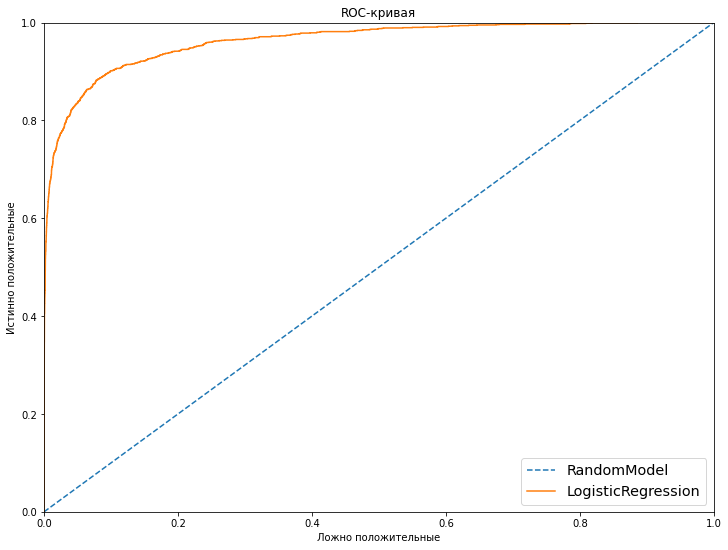

CPU times: user 23.3 s, sys: 22.7 s, total: 46 s
Wall time: 46 s


In [ ]:
%%time
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

regress = LogisticRegression()
regress.set_params(**logreg_best_params)
regress.fit(features_train, target_train)
probabilities_test = regress.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
predict_test = regress.predict(features_test)
plt.plot(fpr, tpr, label='LogisticRegression')
print('Метрики Логистической регрессии')
print('ROC AUC:', roc_auc_score(target_test, probabilities_one_test))
print('Качество модели:', f1_score(target_test, predict_test))
print('Точность модели при измерении класса Positive:', precision_score(target_test, predict_test))
print('Отношение истинно положительных к общему числу положительных:', recall_score(target_test, predict_test))
print('Общая точность предсказания:', accuracy_score(target_test, predict_test))
print()

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("Ложно положительные")
plt.ylabel("Истинно положительные")

plt.legend(loc='lower right', fontsize='x-large')

plt.title("ROC-кривая")
plt.show()

### Промежуточные выводы

1. Проведено устранение дисбаланса методом взвешивания классов и методом уменьшения выборки. Для дальнейшей работы использовался баланс взвешиванием классов;
2. Проведено обучения моделей Категориального бустинга, Древа решений и Логистической регрессии;
3. По метрике f1 лучшая модель - модель логистической регрессии4;
4. Проведено предсказание лучшей модели на тестовой выборке.

## Выводы

В результате выполнения задания сделано следующее:
1. Проведена загрузка данных;
2. Удалён столбец, дублирующий номер строки;
3. Пропусков и дубликатов не обнаружено;
4. Проведена лемматизация данных;
5. Проведено разбиение данных на обучающую, валидационную и тестовую выборки в соотношении 80/10/10;
6. Проведено устранение дисбаланса методом взвешивания классов и методом уменьшения выборки. Для дальнейшей работы использовался баланс взвешиванием классов;
7. Проведено обучения моделей Категориального бустинга, Древа решений и Логистической регрессии;
8. По метрике f1 лучшая модель - модель логистической регрессии4;
9. Проведено предсказание лучшей модели на тестовой выборке.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны